In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
data = pd.read_csv('CC GENERAL.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [9]:
columns = ['BALANCE_FREQUENCY','ONEOFF_PURCHASES','ONEOFF_PURCHASES_FREQUENCY',
           'PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','PRC_FULL_PAYMENT']
new_data = data.drop(columns, axis=1)
new_data.dropna(inplace=True)
new_data.head()

,CUST_ID,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE
0,C10001,40.900749,95.40,95.40,0.000000,0.166667,0,2,1000.0,201.802084,139.509787,12
1,C10002,3202.467416,0.00,0.00,6442.945483,0.000000,4,0,7000.0,4103.032597,1072.340217,12
2,C10003,2495.148862,773.17,0.00,0.000000,1.000000,0,12,7500.0,622.066742,627.284787,12
4,C10005,817.714335,16.00,0.00,0.000000,0.083333,0,1,1200.0,678.334763,244.791237,12
5,C10006,1809.828751,1333.28,1333.28,0.000000,0.666667,0,8,1800.0,1400.057770,2407.246035,12


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = new_data.iloc[:,1:]
clus_dataset = scaler.fit_transform(X)
clus_dataset

array([[-0.74462486, -0.42918384, -0.35482593, ..., -0.54394191,
        -0.30550763,  0.35518066],
       [ 0.76415211, -0.47320819, -0.45883904, ...,  0.79685226,
         0.08768873,  0.35518066],
       [ 0.42660239, -0.11641251, -0.45883904, ..., -0.39950328,
        -0.09990611,  0.35518066],
       ...,
       [-0.75297728, -0.40657175, -0.30140201, ..., -0.5853667 ,
        -0.32957217, -4.22180042],
       [-0.75772142, -0.47320819, -0.45883904, ..., -0.59523762,
        -0.34081076, -4.22180042],
       [-0.58627829,  0.03129519, -0.45883904, ..., -0.59158925,
        -0.32709767, -4.22180042]])

In [30]:
ClusterNum = 4
k_means = KMeans(init="k-means++", n_clusters=ClusterNum, n_init=12)
k_means.fit(clus_dataset)
labels = k_means.labels_
print(labels)

[1 0 2 ... 2 1 1]


In [31]:
new_data['Clus_Labels'] = labels
new_data.head()

,CUST_ID,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE,Clus_Labels
0,C10001,40.900749,95.40,95.40,0.000000,0.166667,0,2,1000.0,201.802084,139.509787,12,1
1,C10002,3202.467416,0.00,0.00,6442.945483,0.000000,4,0,7000.0,4103.032597,1072.340217,12,0
2,C10003,2495.148862,773.17,0.00,0.000000,1.000000,0,12,7500.0,622.066742,627.284787,12,2
4,C10005,817.714335,16.00,0.00,0.000000,0.083333,0,1,1200.0,678.334763,244.791237,12,1
5,C10006,1809.828751,1333.28,1333.28,0.000000,0.666667,0,8,1800.0,1400.057770,2407.246035,12,2


In [35]:
data_array = scaler.fit_transform(new_data.values[:,1:])

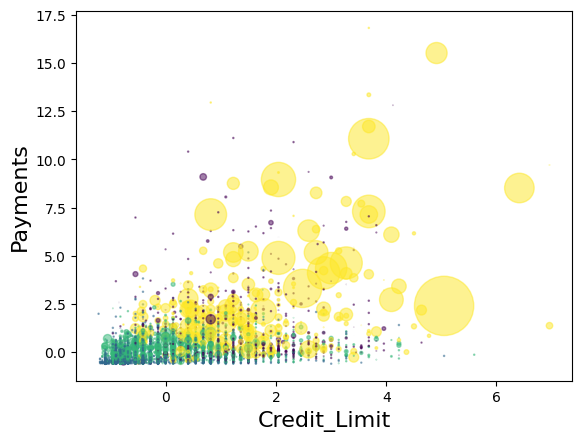

In [41]:
area = np.pi * (data_array[:,2]) ** 2
plt.scatter(data_array[:,-5], data_array[:,-4], s=area, c=labels.astype(float), alpha=0.5)
plt.xlabel('Credit_Limit', fontsize=16)
plt.ylabel('Payments', fontsize=16)
plt.show()